In [127]:
#Read data (loan.csv) file into dataframe
import pandas as pd
import matplotlib.pyplot as plt  
import math
from math import pi
import numpy as np
import seaborn as sns
import warnings  
warnings.filterwarnings('ignore')
np.seterr(divide='ignore', invalid='ignore')
%matplotlib inline 


loans = pd.read_csv("D:\\Python\\lendingclub\\loan\\loan.csv")


In [83]:
loans.shape

(39717, 111)

In [128]:
na_thresh = len(loans)*80/100
loans = loans.dropna(thresh=na_thresh, axis=1)

loans.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 53 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

In [129]:
#Check application_type is a useful variable or not
loans['application_type'].unique()

array(['INDIVIDUAL'], dtype=object)

In [130]:
# application_type has only one value can ignore for EDA
#Policy code has only one value 1 i.e., publicly available - remove the column 
# One other feature having one value f i.e., initial list status
# Pymnt_plan also have one value n - as it would not help in EDA - remove the column
# Chargeoff_within_12_mths have 2 values 0 or NA. Ignore this
loans = loans.drop(['policy_code', 'application_type', 'initial_list_status', 'pymnt_plan','chargeoff_within_12_mths'], axis=1)
loans.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,acc_now_delinq,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,0.00,0.00,Jan-15,171.62,May-16,0.0,0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,117.08,1.11,Apr-13,119.66,Sep-13,0.0,0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,0.00,0.00,Jun-14,649.91,May-16,0.0,0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,0.00,0.00,Jan-15,357.48,Apr-16,0.0,0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,0.00,0.00,May-16,67.79,May-16,0.0,0,0,0.0,0.0


In [131]:
#Public records - This variable is correlated to charged-off rates. But, it's value is low. Most of the cases it has zeroes. 94% 0's are presented.
#0 public records has a strong indicator that he has greater chances to pay off the debt

print(len(loans[loans['pub_rec']==0])/len(loans)*100)

print(len(loans[loans['pub_rec_bankruptcies']>0])/len(loans)*100)

loans.groupby(['pub_rec_bankruptcies','loan_status']).loan_amnt.agg(["count"]).sort_values(['pub_rec_bankruptcies'],ascending=True)


94.6723065689755
4.232444545156986


count
pub_rec_bankruptcies loan_status       
0.0                  Charged Off   5141
                     Current       1101
                     Fully Paid   31097
1.0                  Charged Off    366
                     Current         37
                     Fully Paid    1271
2.0                  Charged Off      2
                     Current          2
                     Fully Paid       3

In [132]:
#Looking for loans that were delinquent at some point in time
print(loans[loans['recoveries'] != 0])

            id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
1      1077430    1314167       2500         2500           2500.0   
8      1071795    1306957       5600         5600           5600.0   
9      1071570    1306721       5375         5375           5350.0   
12     1064687    1298717       9000         9000           9000.0   
14     1069057    1303503      10000        10000          10000.0   
...        ...        ...        ...          ...              ...   
39638   127830     127824       8000         8000            150.0   
39640   127472     127460       2125         2125            550.0   
39666   119043     119040      15450        15450            600.0   
39667   118823     118026       2500         2500            675.0   
39678   113179     113093       1000         1000            950.0   

             term int_rate  installment grade sub_grade  ...   recoveries  \
1       60 months   15.27%        59.83     C        C4  ...   117.080000   
8    

In [133]:
loans.isnull().sum()

id                               0
member_id                        0
loan_amnt                        0
funded_amnt                      0
funded_amnt_inv                  0
term                             0
int_rate                         0
installment                      0
grade                            0
sub_grade                        0
emp_title                     2459
emp_length                    1075
home_ownership                   0
annual_inc                       0
verification_status              0
issue_d                          0
loan_status                      0
url                              0
purpose                          0
title                           11
zip_code                         0
addr_state                       0
dti                              0
delinq_2yrs                      0
earliest_cr_line                 0
inq_last_6mths                   0
open_acc                         0
pub_rec                          0
revol_bal           

In [52]:
loans.groupby(['grade']).loan_amnt.agg(["count","sum","mean","median"]).sort_values(['grade'],ascending=True)

,count,sum,mean,median
grade,,,,
A,10085,86982400,8624.928111,7500
B,12020,133651350,11119.080699,10000
C,8098,89115825,11004.670906,9725
D,5307,65160400,12278.198606,10000
E,2842,45037900,15847.255454,15000
F,1049,19263100,18363.298379,18000
G,316,6391675,20226.819620,20250


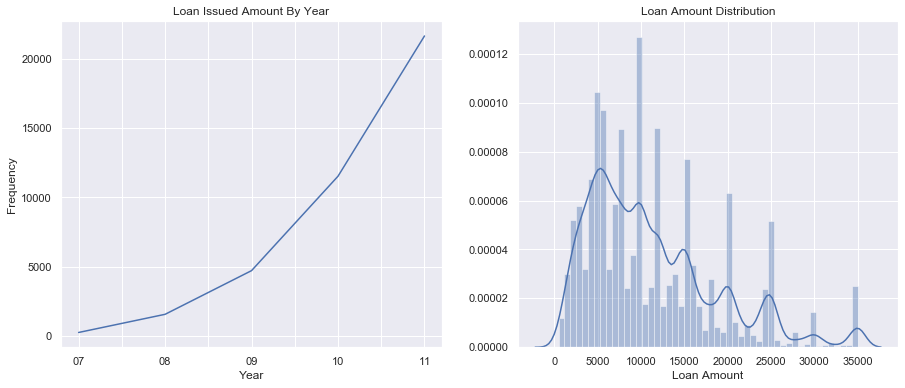

In [135]:
# Convert 'issue_d' column to datetime format

#loans['issue_d'] = pd.to_datetime(loans['issue_d'],format='%b-%y')

loans[['Month','Year']] = loans.issue_d.str.split('-',expand=True)
year_dist = loans.groupby(['Year']).size()


plt.figure(figsize=(15,6))
sns.set()

ax1 = plt.subplot(1, 2, 1)
ax1 = year_dist.plot()
ax1 = plt.title('Loan Issued Amount By Year')
ax1 = plt.xlabel('Year')
ax1 = plt.ylabel('Frequency')

ax2 = plt.subplot(1, 2, 2)
ax2 = sns.distplot(loans['loan_amnt'])
ax2 = plt.title('Loan Amount Distribution')
ax2 = plt.xlabel('Loan Amount')

Text(0.5, 1.0, 'Total committed by Investors')

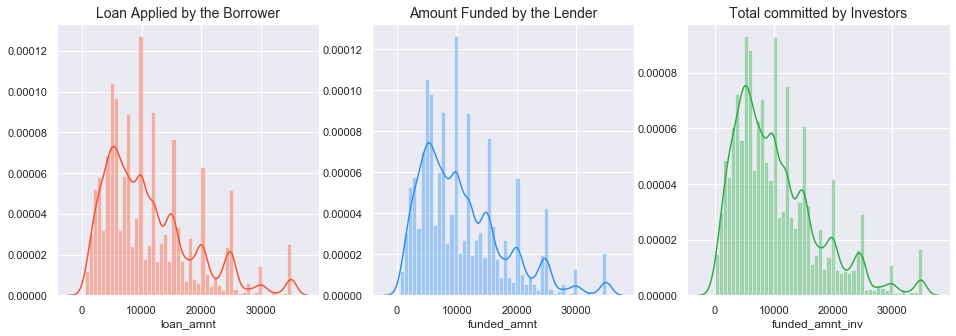

In [136]:
fig, ax = plt.subplots(1, 3, figsize=(16,5))

sns.distplot(loans["loan_amnt"], ax=ax[0], color="#F7522F")
ax[0].set_title("Loan Applied by the Borrower", fontsize=14)
sns.distplot(loans["funded_amnt"], ax=ax[1], color="#2F8FF7")
ax[1].set_title("Amount Funded by the Lender", fontsize=14)
sns.distplot(loans["funded_amnt_inv"], ax=ax[2], color="#2EAD46")
ax[2].set_title("Total committed by Investors", fontsize=14)

Text(0, 0.5, 'Average loan amount issued')

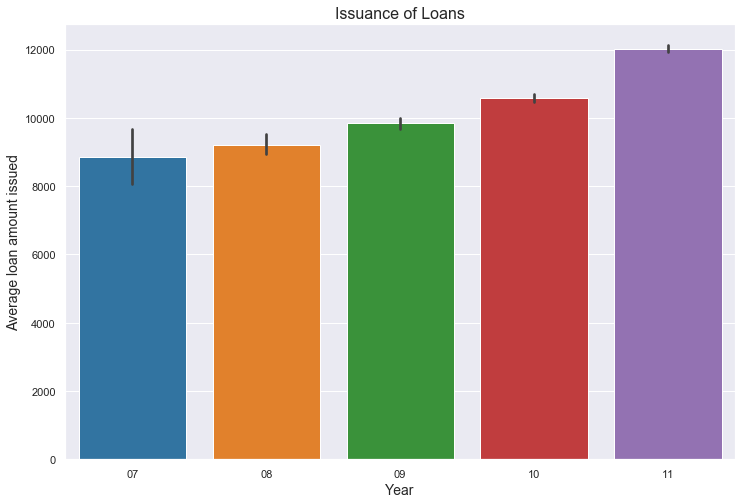

In [137]:
plt.figure(figsize=(12,8))
sns.barplot('Year', 'loan_amnt', data=loans, palette='tab10')
plt.title('Issuance of Loans', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average loan amount issued', fontsize=14)

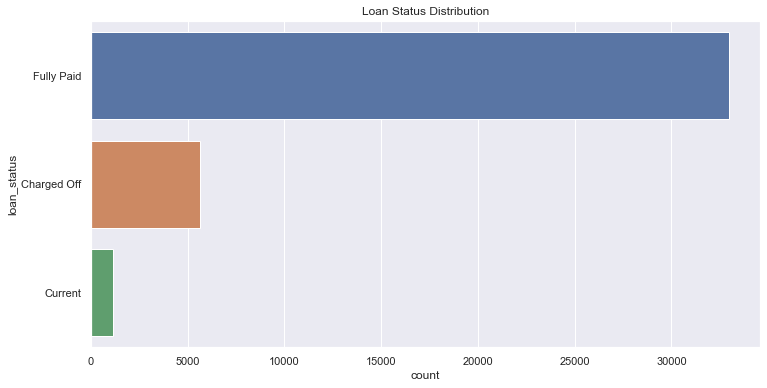

In [138]:
#Loan status distribution
plt.figure(figsize=(12,6))
ax = sns.countplot(y=loans['loan_status'],order = loans['loan_status'].value_counts().index)
ax = plt.title('Loan Status Distribution')

#### Alalyzing Loans over loan status.¶
#### Number of loans over for each loan status
#### Distribution of total accounts for each status
#### Distribution of loan amount with the probability density for each loan value over loan status

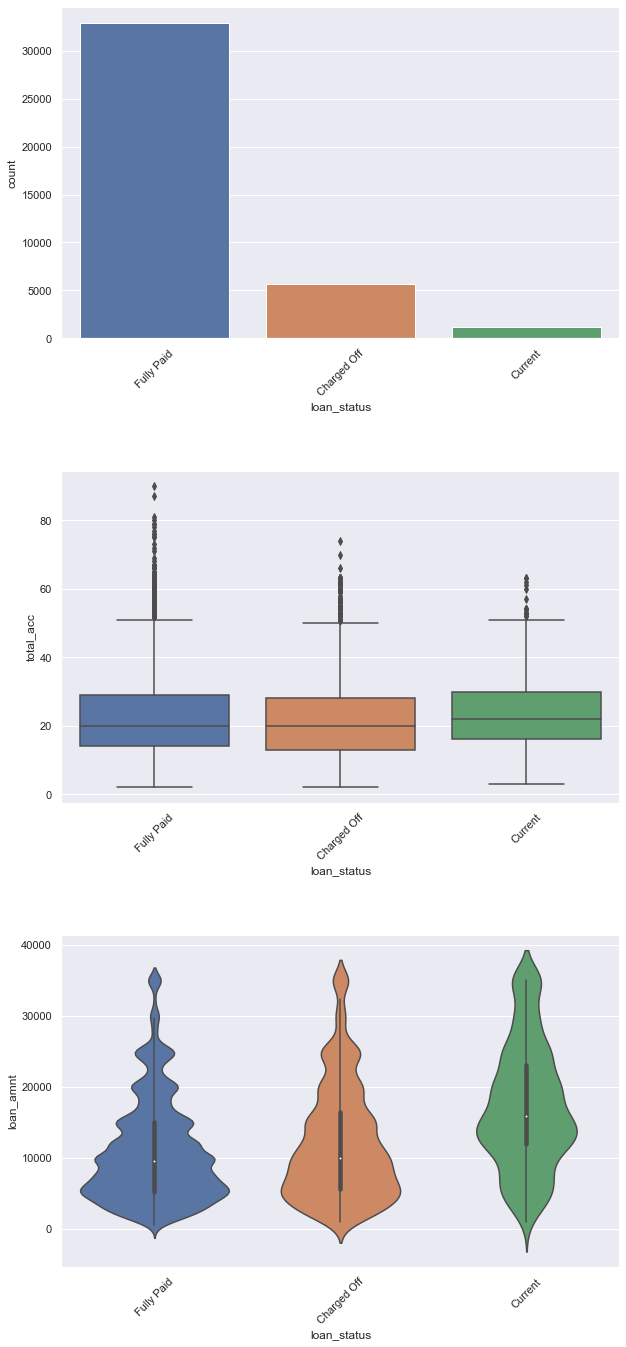

In [139]:
fig, ax =plt.subplots(3,1,figsize=(10,20))
plt.subplots_adjust(hspace = 0.4, top = 1.0)

s0 = sns.countplot(x="loan_status", data=loans,ax=ax[0])
s0.set_xticklabels(s0.get_xticklabels(),rotation=45)

s1 = sns.boxplot(x="loan_status", y="total_acc", data=loans,ax=ax[1])
s1.set_xticklabels(s1.get_xticklabels(),rotation=45)

s2 = sns.violinplot(x="loan_status", y="loan_amnt", data=loans,ax=ax[2] , estimator=sum)
s2.set_xticklabels(s2.get_xticklabels(),rotation=45)

plt.show()


### Analysing loan amount distribution for each grade, factored over sub grade.¶
#### This shows a linear relationship between loan amount and customer credit ratings, Notice here that requested loan amount is slightly higher for the low rating customers.

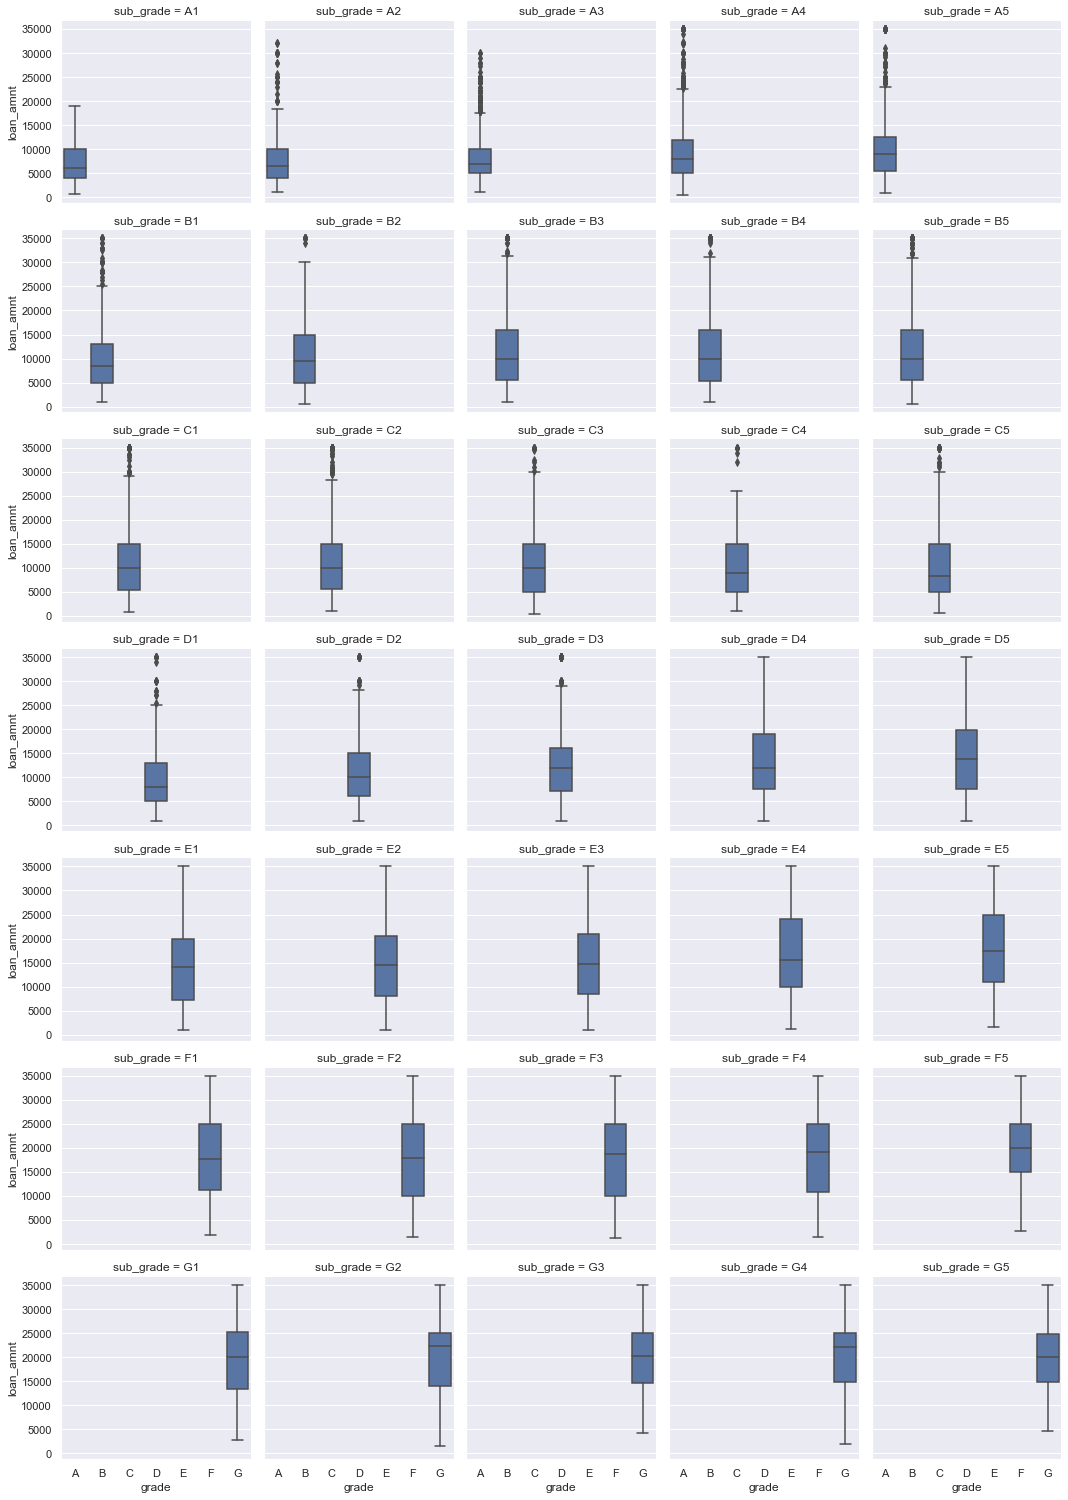

In [140]:
loans['grade']=loans['grade'].astype('category')
loans['sub_grade']=loans['sub_grade'].astype('category')
g = sns.FacetGrid(loans, col="sub_grade", sharex=True, col_wrap=5)
g.map(sns.boxplot, 'grade', 'loan_amnt')

### Analyzing interest rate distribution for each grade, factored over sub grade.¶
#### This shows the interest rates goes high for low credit rating customers.

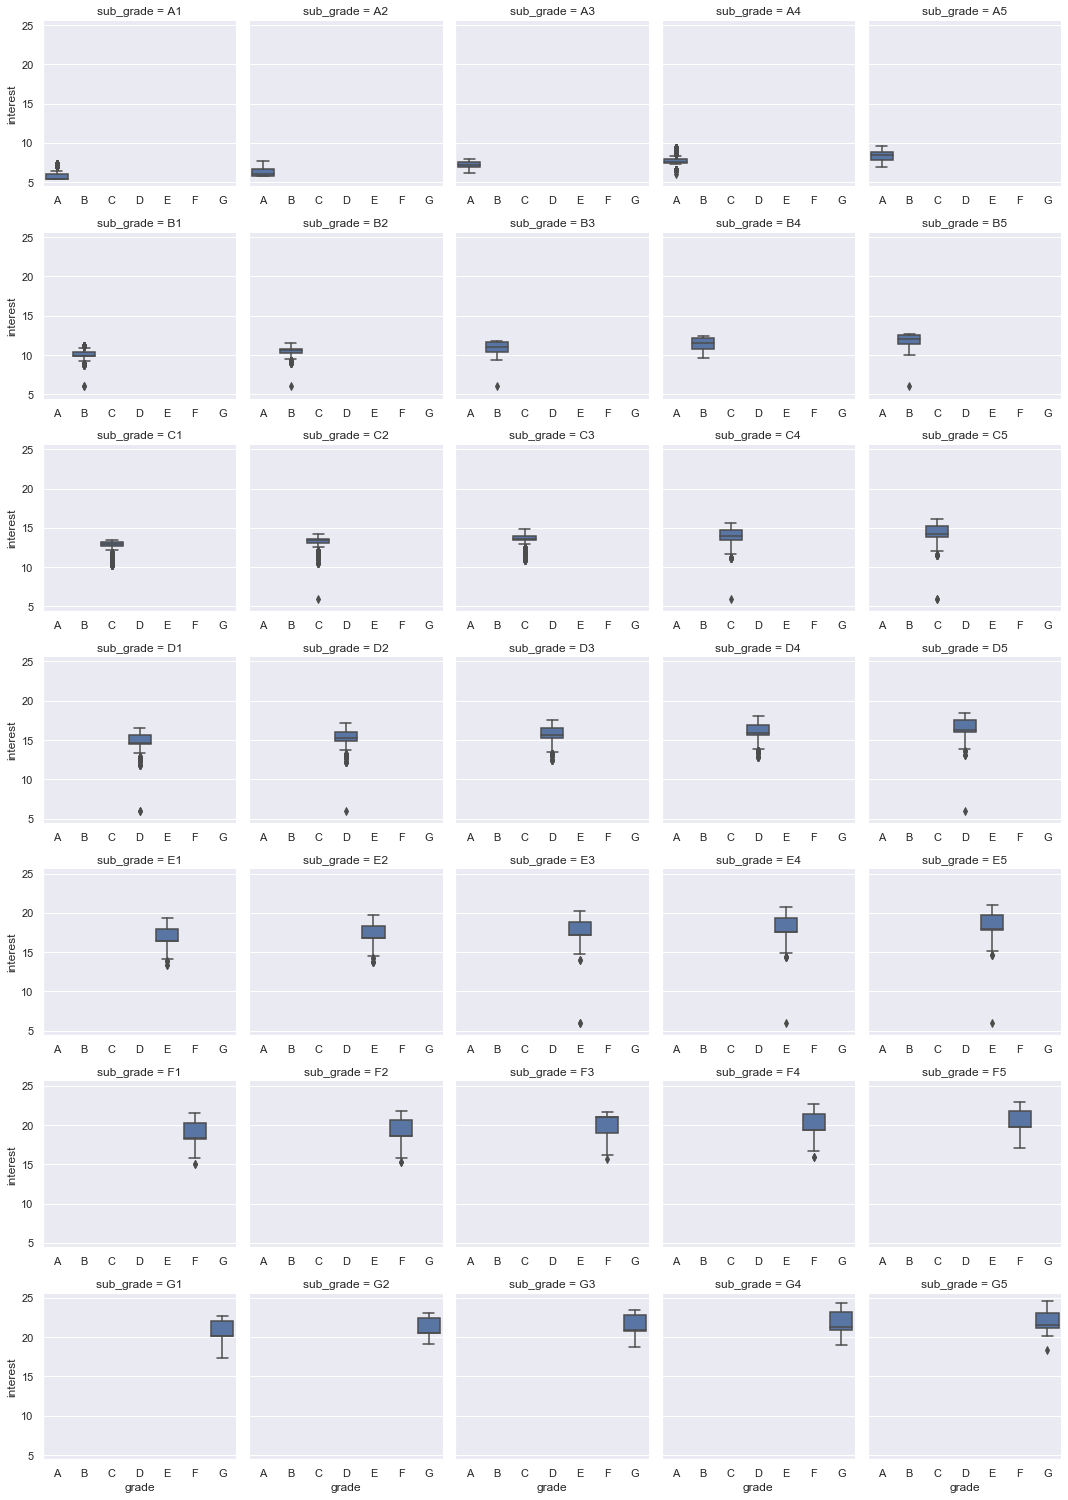

In [143]:
g = sns.FacetGrid(loans, col="sub_grade", sharex=False, col_wrap=5)

loans['interest']=loans['int_rate'].astype("str").str.replace('%','')
loans['interest']=loans['interest'].str.replace('nan','')
loans['interest']=pd.to_numeric(loans['interest'])

g.map(sns.boxplot, 'grade', 'interest')

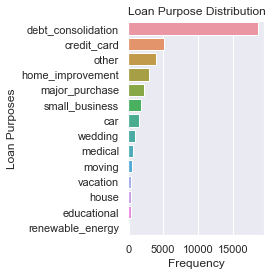

In [57]:
ax2 = plt.subplot(1, 2, 2)
ax2 = sns.countplot(y=loans['purpose'],order = loans['purpose'].value_counts().index)
ax2 = plt.title('Loan Purpose Distribution')
ax2 = plt.ylabel('Loan Purposes')
ax2 = plt.xlabel('Frequency')
ax2 = plt.tight_layout()

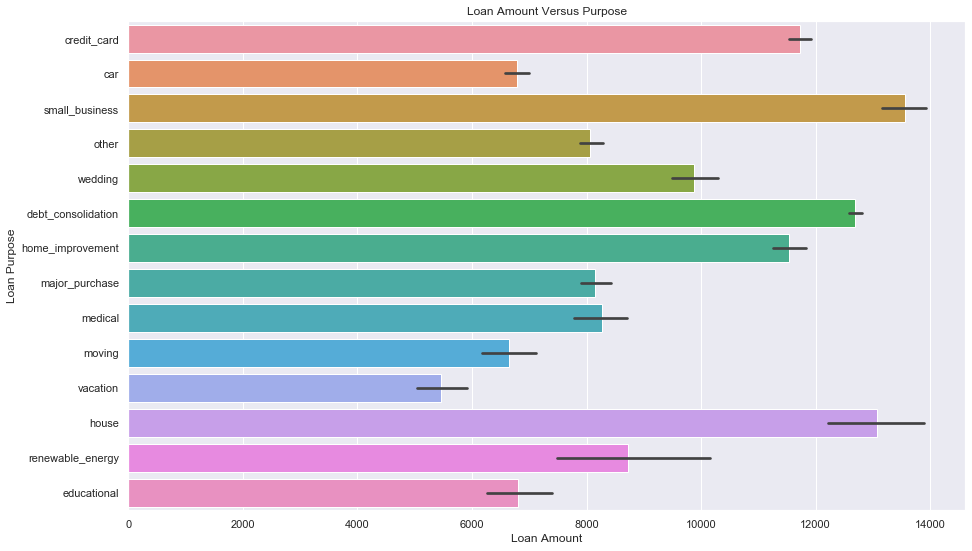

In [58]:
#Loan amount vs. purpose

plt.figure(figsize=(15,9))
ax = sns.barplot(y="purpose", x="loan_amnt", data=loans)
ax = plt.xlabel('Loan Amount')
ax = plt.ylabel('Loan Purpose')
ax = plt.title('Loan Amount Versus Purpose')

verification_status
Not Verified       2142
Source Verified    1434
Verified           2051
Name: id, dtype: int64


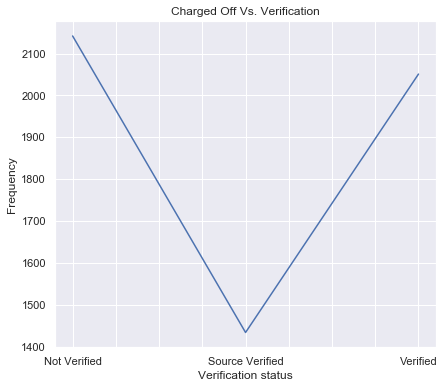

In [97]:
#Charged off loan status count group by Verification status
verify_dist=loans.loc[loans['loan_status'] == 'Charged Off'].groupby("verification_status")['id'].size()
print(verify_dist)
plt.figure(figsize=(15,6))
sns.set()

ax1 = plt.subplot(1, 2, 1)
ax1 = verify_dist.plot()
ax1 = plt.title('Charged Off Vs. Verification')
ax1 = plt.xlabel('Verification status')
ax1 = plt.ylabel('Frequency')


loan_status  Year
Charged Off  07      10853.333333
             08      11091.497976
             09      10532.786195
             10      10775.218855
             11      13091.431204
Current      11      17053.991228
Fully Paid   07       8402.305825
             08       8859.828897
             09       9747.658903
             10      10555.290136
             11      11497.064021
Name: loan_amnt, dtype: float64


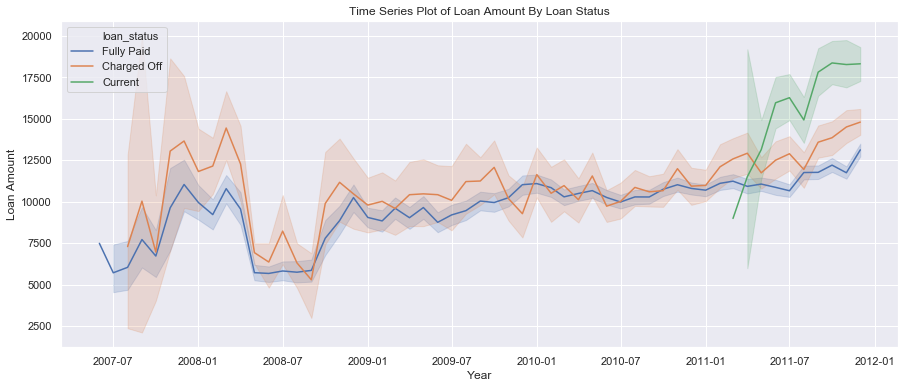

In [59]:
plt.figure(figsize=(15,6))
print(loans.groupby(['loan_status','Year'])['loan_amnt'].mean())
loans['issue_d'] = pd.to_datetime(loans['issue_d'],format='%b-%y')
ax = sns.lineplot(x="issue_d", y="loan_amnt",hue="loan_status", data=loans)
ax = plt.title('Time Series Plot of Loan Amount By Loan Status')
ax = plt.xlabel('Year')
ax = plt.ylabel('Loan Amount')



In [17]:
loans['loan_status'].unique()
loans.groupby('loan_status')['issue_d'].count().sort_values(ascending=False)

loan_status
Fully Paid     32950
Charged Off     5627
Current         1140
Name: issue_d, dtype: int64

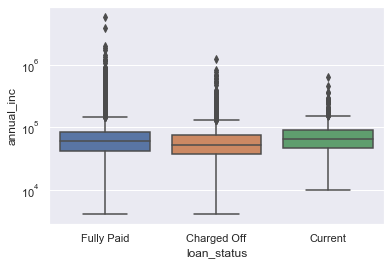

In [60]:
sns.boxplot(x='loan_status', y='annual_inc', data=loans)
plt.yscale('log')
plt.show()

In [66]:
bins = []
labels = []
i = 0

for x in range(0, 10):
    lowerRange = loans['annual_inc'].quantile(x/10)
    upperRange = loans['annual_inc'].quantile((x+1)/10)
    bins.append(lowerRange)    
    labels.append("".join((str(lowerRange)," - ",str(upperRange))))
    

bins.append(upperRange)

loans['annual_inc_dist']=pd.cut(x=loans['annual_inc'], bins=bins, labels=labels, duplicates='drop')

print(loans.groupby(['annual_inc_dist','loan_status'])['loan_status'].count())

annual_inc_dist              loan_status
4000.0 - 30000.0             Charged Off     839
                             Current          73
                             Fully Paid     3711
30000.0 - 37500.0            Charged Off     585
                             Current          64
                             Fully Paid     2696
37500.0 - 45000.0            Charged Off     743
                             Current         124
                             Fully Paid     3852
45000.0 - 50400.0            Charged Off     486
                             Current         102
                             Fully Paid     2680
50400.0 - 59000.0            Charged Off     559
                             Current         121
                             Fully Paid     3254
59000.0 - 65844.39999999997  Charged Off     576
                             Current         107
                             Fully Paid     3257
65844.39999999997 - 75600.0  Charged Off     519
                            

In [64]:
loans.groupby(['delinq_2yrs', 'loan_status'])['loan_amnt'].count()



delinq_2yrs  loan_status
0            Charged Off     4936
             Current         1019
             Fully Paid     29450
1            Charged Off      507
             Current           96
             Fully Paid      2700
2            Charged Off      130
             Current           14
             Fully Paid       543
3            Charged Off       35
             Current            8
             Fully Paid       177
4            Charged Off       13
             Current            2
             Fully Paid        47
5            Charged Off        3
             Current            1
             Fully Paid        18
6            Charged Off        1
             Fully Paid         9
7            Charged Off        1
             Fully Paid         3
8            Charged Off        1
             Fully Paid         1
9            Fully Paid         1
11           Fully Paid         1
Name: loan_amnt, dtype: int64

In [67]:
print(loans.groupby(['annual_inc_dist','loan_status'])['loan_status'].count())

annual_inc_dist              loan_status
4000.0 - 30000.0             Charged Off     839
                             Current          73
                             Fully Paid     3711
30000.0 - 37500.0            Charged Off     585
                             Current          64
                             Fully Paid     2696
37500.0 - 45000.0            Charged Off     743
                             Current         124
                             Fully Paid     3852
45000.0 - 50400.0            Charged Off     486
                             Current         102
                             Fully Paid     2680
50400.0 - 59000.0            Charged Off     559
                             Current         121
                             Fully Paid     3254
59000.0 - 65844.39999999997  Charged Off     576
                             Current         107
                             Fully Paid     3257
65844.39999999997 - 75600.0  Charged Off     519
                            

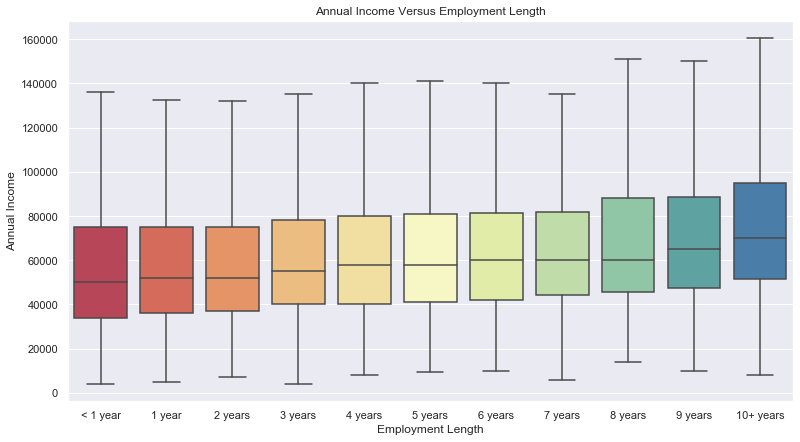

In [69]:
# emp_length and annual income are correlated each other ... Hence, keep one variable
plt.figure(figsize=(13,7))

cols = ['< 1 year','1 year','2 years','3 years','4 years','5 years','6 years','7 years','8 years','9 years','10+ years']

ax = sns.boxplot(x="emp_length", y="annual_inc",  data=loans,order=cols,showfliers=False,palette='Spectral')

ax = plt.ylabel('Annual Income')
ax = plt.xlabel('Employment Length')
ax = plt.title('Annual Income Versus Employment Length')



array([ 0., nan])